In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

In [2]:
api = wandb.Api()

runs = api.runs("jschuetzke/synthetic-benchmark")
summary = {}
for run in runs:
    if run.config["evaluation"] == "challenge":
        # run.name is the name of the run
        sum_dict = run.summary
        sum_dict['model_type'] = run.config['model_type']
        sum_dict['seed'] = run.config['seed']
        sum_dict['activation'] = run.config['activation']
        # filter metrics starting with underscore char (_)
        summary[run.name] = {key: value for key, value in sum_dict.items() if not key.startswith('_')}

In [3]:
df = pd.DataFrame.from_dict(summary, orient='index').reset_index(names='Name')[::-1]

In [4]:
df.head()

,Name,epoch,accuracy,best_epoch,best_val_accuracy,loss,wrong_class,val_accuracy,test_accuracy,val_loss,lr,GFLOPS,best_accuracy,best_val_loss,model_type,seed,activation
74,cnn2-0-noact,48,0.879259,23,0.737037,0.309286,62,0.733333,0.617284,0.607552,3.000000e-06,0.06973,0.808889,0.595704,cnn2,0,linear
73,cnn2-1-noact,71,0.838519,46,0.722222,0.369052,59,0.740741,0.635802,0.614969,3.000000e-07,0.06973,0.841482,0.609124,cnn2,1,linear
72,cnn2-2-noact,51,0.880741,26,0.707407,0.309217,66,0.722222,0.592593,0.638663,3.000000e-06,0.06973,0.782963,0.629616,cnn2,2,linear
71,cnn2-3-noact,70,0.862222,45,0.725926,0.339157,59,0.733333,0.635802,0.622500,3.000000e-07,0.06973,0.833333,0.614875,cnn2,3,linear
70,cnn2-4-noact,48,0.868889,23,0.659259,0.339440,69,0.718518,0.574074,0.637610,3.000000e-06,0.06973,0.777037,0.633293,cnn2,4,linear


In [5]:
selection = df[df["model_type"].isin(["cnn2","cnn3","cnn6","inc3","inc6"])]

### Actual Figures

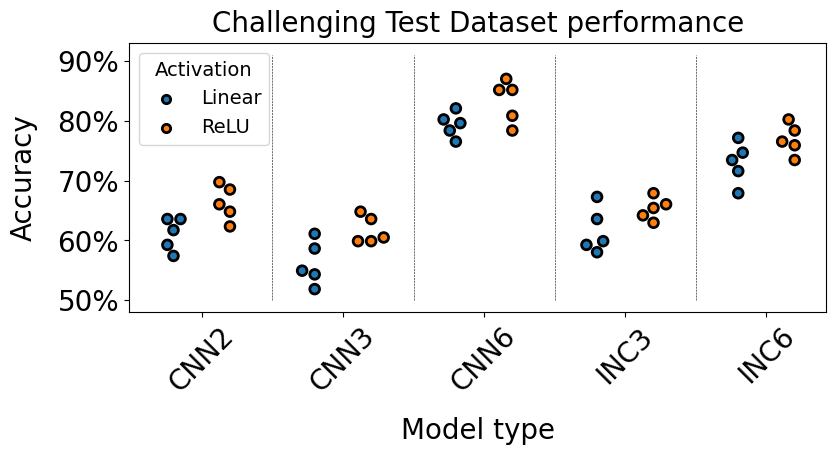

In [6]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'ps.fonttype': 42})

plt.figure(figsize=(9, 3.5))
ax = plt.gca()
#sns.violinplot(x='model_type', y='wrong_class', data=df, ax=ax, color=sns.color_palette()[0], cut=0.99, width=0.9, inner="point")
sns.swarmplot(data=selection, x="model_type", y="test_accuracy", hue="activation", dodge=True, s=7, linewidth=2, edgecolor="black", marker="o")
ax.plot([0.5,0.5],[0.5,0.91], linestyle="--", color="black", lw=.4)
ax.plot([1.5,1.5],[0.5,0.91], linestyle="--", color="black", lw=.4)
ax.plot([2.5,2.5],[0.5,0.91], linestyle="--", color="black", lw=.4)
ax.plot([3.5,3.5],[0.5,0.91], linestyle="--", color="black", lw=.4)
handles, labels = ax.get_legend_handles_labels()
handles[0].set(edgecolor="black", linewidth=2)
handles[1].set(edgecolor="black", linewidth=2)
plt.legend(title="Activation", handles=handles, labels=["Linear","ReLU"])
ax.set_ylabel('Accuracy', fontsize=20, labelpad=14)
plt.xticks(np.arange(5),['CNN2','CNN3','CNN6','INC3', 'INC6'], fontsize=20, rotation=45)
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Model type', fontsize=20, labelpad=14)
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9], ["50%", "60%", "70%", "80%", "90%"], fontsize=20)#, labelpad=14)
plt.title('Challenging Test Dataset performance', fontsize=20, y=1.01)
#plt.savefig('../figures/challenge_accuracies.eps', bbox_inches='tight')
plt.show()